<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

In this lab, we delve into the fundamental concept of feature selection. We start by conducting correlation analysis to identify relevant features for our regression model. By examining the relationship between each feature and the target variable, we aim to pick the most influential features. Additionally, we explore the significance of cross validation in model evaluation and how it relates to feature selection. Through cross validation, we ensure that our model generalises well to unseen data by assessing its performance across multiple validation sets.

### 1. Load & Explore Data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [55]:
# Read CSV
wine_csv = '/Users/tresornoel/Desktop/IOD/DATA/winequality_merged.csv'
df = pd.read_csv(wine_csv)

#### 1.2 Explore Data (Exploratory Data Analysis)

In [56]:
# ANSWER
#printing thee head 
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  red_wine  
0      9.4        5         1  
1      9.8        5         1  
2      9.8        5         1  
3      9.8        6         1  
4      9.4        5         1

In [57]:
#checking the statistical summary
df.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   
red_wine              6497.0    0.246114   0.430779  0.00000   0.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000  
red_wine                0.00000    0.00000    1.00000

In [58]:
#having an overview info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [59]:
#checkinng if we have some missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [60]:
#checking the correlation between our features
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
red_wine                   0.486740          0.653036    -0.187397   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   
red_wine                   -0.348821   0.512678            -0.471644   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   
red_wine                         -0.700357  0.390645  0.329129   0.487218   

                       alcohol   quality  red_wine  
fixed acidity        -0.095452 -0.076743  0.486740  
volatile acidity     -0.037640 -0.265699  0.653036  
citric acid          -0.010493  0.085532 -0.187397  
residual sugar       -0.359415 -0.036980 -0.348821  
chlorides            -0.256916 -0.200666  0.512678  
free sulfur dioxide  -0.179838  0.055463 -0.471644  
total sulfur dioxide -0.265740 -0.041385 -0.700357  
density              -0.686745 -0.305858  0.390645  
pH                    0.121248  0.019506  0.329129  
sulphates            -0.003029  0.038485  0.487218  
alcohol               1.000000  0.444319 -0.032970  
quality               0.444319  1.000000 -0.119323  
red_wine             -0.032970 -0.119323  1.000000

In [61]:
df.shape

(6497, 13)

<Axes: >

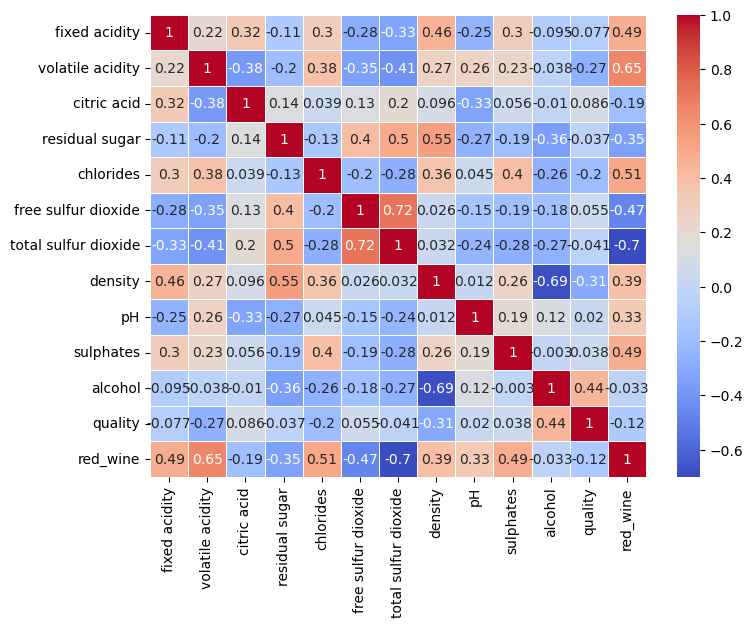

In [62]:
#plotting a heatmap to visualize the correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5)

### 2. Set Target Variable

Create a target variable for wine quality.

In [63]:
# Target Variable

y = df['quality']


### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reasoning for the choices you make.

In [64]:
# ANSWER
#alcohol, residual sugar, density, chlorides arre the features that i picked. 
#because they are more correlated to the target and more correlation between themselves.
predictor_features = ['alcohol', 'residual sugar', 'chlorides', 'density']
X = df[predictor_features]

### 4. Using Linear Regression Create a Model and Test Score

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [66]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [67]:
# Create a model for Linear Regression
model = LinearRegression()

# Fit the model with the Training data
model.fit(X_train, y_train)
# Calculate the score (R^2 for Regression) for Training Data
score_train = model.score(X_train, y_train)
print("R^2 Score:", score_train)

# Calculate the score (R^2 for Regression) for Testing Data
score_test = model.score(X_test, y_test)
print("R^2 Score:", score_test)


R^2 Score: 0.2228413624888349
R^2 Score: 0.2090521165389012


## BONUS: Cross validation

In [74]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
# Set up 5-fold cross validation
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train_index, test_index) in enumerate(k_fold.split(X)):

    # Get training and test sets for X and y
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit model with training set
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions with training and test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse1 = np.sqrt(mean_squared_error(y_train,y_train_pred))
    test_rmse1 = np.sqrt(mean_squared_error(y_test,y_test_pred))

    # Append scores to the lists
    train_scores.append(train_r2)
    test_scores.append(test_r2)
    train_rmse.append(train_rmse1)
    test_rmse.append(test_rmse1)
    
    print(f"Fold {k+1}:")
    print(f'Train R2 : {train_r2}, Test R2 : {test_r2}')
    print(f'Train RMSE : {train_rmse1}, Test RMSE : {test_rmse1}')

# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({
    'Train R2': train_scores,
    'Test R2': test_scores,
    'Train RMSE': train_rmse1,
    'Test RMSE': test_rmse1
})

print(metrics_df)

Fold 1:
Train R2 : 0.22311981627524102, Test R2 : 0.2056281087210894
Train RMSE : 0.7670921315617403, Test RMSE : 0.7873549542322458
Fold 2:
Train R2 : 0.21292057192697877, Test R2 : 0.249720599301272
Train RMSE : 0.7751117633951268, Test RMSE : 0.7545017835943674
Fold 3:
Train R2 : 0.21659421453987493, Test R2 : 0.23440881233930255
Train RMSE : 0.774611239131581, Test RMSE : 0.7567834659267554
Fold 4:
Train R2 : 0.22452270878490854, Test R2 : 0.20061906733002244
Train RMSE : 0.7731258009946976, Test RMSE : 0.7632136632858942
Fold 5:
Train R2 : 0.22547091768510918, Test R2 : 0.2004418790004321
Train RMSE : 0.764527888711266, Test RMSE : 0.7965171458322382
   Train R2   Test R2  Train RMSE  Test RMSE
0  0.223120  0.205628    0.764528   0.796517
1  0.212921  0.249721    0.764528   0.796517
2  0.216594  0.234409    0.764528   0.796517
3  0.224523  0.200619    0.764528   0.796517
4  0.225471  0.200442    0.764528   0.796517


# Describe the metrics
the train set R2 are relatively which indicates that the model perform poorly, theres no huge difference with the test set which indicates that the mnodel generalises well on unseen data;  on the hand the training set on rmse is high whi indicates also a poor performance of the model and there's a slight difference with the test set.

### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data?

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



